In [1]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the digits dataset
digits = load_digits()

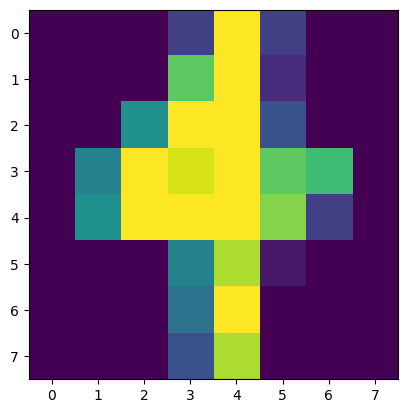

In [3]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[134])

In [4]:
X = digits.data  # Features
y = digits.target  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create the model (Logistic Regression)
model = LogisticRegression(max_iter=10000)

# Create StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform Stratified K-Fold Cross-Validation on training data
cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold)


In [6]:
# Create a list of models
models = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Create StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5)

# Loop through each model, apply Stratified K-Fold Cross-Validation manually, and output results
for name, model in models.items():
    print(f"Model: {name}")
    
    # Variables to store cross-validation results
    accuracies = []
    
    # Use StratifiedKFold to split the data
    for train_index, test_index in stratified_kfold.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Evaluate the model
        accuracy = model.score(X_test_fold, y_test_fold)
        accuracies.append(accuracy)
    
    # Calculate the mean and standard deviation of the accuracies
    mean_accuracy = np.mean(accuracies)
    std_dev_accuracy = np.std(accuracies)
    
    print(f"Stratified K-Fold cross-validation scores: {accuracies}")
    print(f"Mean accuracy: {mean_accuracy:.4f}")
    print(f"Standard deviation of accuracy: {std_dev_accuracy:.4f}")
    print("-" * 50)

Model: Random Forest Classifier
Stratified K-Fold cross-validation scores: [0.9756944444444444, 0.9722222222222222, 0.9547038327526133, 0.9790940766550522, 0.9547038327526133]
Mean accuracy: 0.9673
Standard deviation of accuracy: 0.0105
--------------------------------------------------
Model: Logistic Regression
Stratified K-Fold cross-validation scores: [0.9583333333333334, 0.9618055555555556, 0.9512195121951219, 0.9651567944250871, 0.9337979094076655]
Mean accuracy: 0.9541
Standard deviation of accuracy: 0.0111
--------------------------------------------------
Model: SVM
Stratified K-Fold cross-validation scores: [0.9756944444444444, 0.9722222222222222, 0.9651567944250871, 0.9825783972125436, 0.9581881533101045]
Mean accuracy: 0.9708
Standard deviation of accuracy: 0.0084
--------------------------------------------------
Model: KNN
Stratified K-Fold cross-validation scores: [0.9965277777777778, 0.9791666666666666, 0.975609756097561, 0.9895470383275261, 0.9721254355400697]
Mean acc

In [7]:
#END